In [13]:
import math
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

In [2]:
#Reading the file in which the values are saved, converting the Date into a panda Datetime format
appa_hours = pd.read_csv("../../exports/appa1.csv")
appa_hours = appa_hours.drop('Unnamed: 0', axis=1)
appa_hours.Time = pd.to_datetime(appa_hours.Time)
appa_hours.columns

Index(['Unnamed: 0.1', 'Time', 'ZnOR_1', 'ZnOR_2', 'LaFeO3_1', 'LaFeO3_2',
       'WO3_1', 'WO3_2', 'ZnOR_1_heatR', 'ZnOR_2_heatR', 'LaFeO3_1_heatR',
       'LaFeO3_2_heatR', 'WO3_1_heatR', 'WO3_2_heatR', 'ZnOR_1_heatV',
       'ZnOR_2_heatV', 'LaFeO3_1_heatV', 'LaFeO3_2_heatV', 'WO3_1_heatV',
       'WO3_2_heatV', 'Temperature', 'Relative_Humidity', 'Pressure', 'VOC',
       'ZnOR_1_Age', 'ZnOR_2_Age', 'LaFeO3_1_Age', 'LaFeO3_2_Age', 'WO3_1_Age',
       'WO3_2_Age', 'sin_hour', 'cos_hour', 'sin_weekday', 'cos_weekday',
       'sin_month', 'cos_month', 'sin_ordate', 'cos_ordate', 'year', 'UV',
       'Rain', 'Wind_Speed', 'sin_wind', 'cos_wind', 'PM10', 'NO2', 'SO2',
       'O3', 'CO'],
      dtype='object')

In [31]:
#selecting all the values we need to train and test the model
appa_hours = appa_hours[[
    'ZnOR_1', 'ZnOR_2', 
    'LaFeO3_1', 'LaFeO3_2',
    'WO3_1', 'WO3_2', 
    'ZnOR_1_heatR', 'ZnOR_2_heatR', 
    'LaFeO3_1_heatR', 'LaFeO3_2_heatR', 
    'WO3_1_heatR', 'WO3_2_heatR', 
    'ZnOR_1_heatV', 'ZnOR_2_heatV', 
    'LaFeO3_1_heatV', 'LaFeO3_2_heatV', 
    'WO3_1_heatV','WO3_2_heatV', 
    'Temperature', 'Relative_Humidity', 'Pressure', 'VOC',
    'ZnOR_1_Age', 'ZnOR_2_Age', 
    'LaFeO3_1_Age', 'LaFeO3_2_Age', 
    'WO3_1_Age', 'WO3_2_Age', 
    'sin_hour', 'cos_hour', 
    'sin_weekday', 'cos_weekday',
    'sin_month', 'cos_month', 
    'sin_ordate', 'cos_ordate', 
    'year', 
    'UV', 'Rain', 
    'Wind_Speed', 'sin_wind', 'cos_wind', 
    'NO2', 'O3', 'CO'
]]

In [5]:
#Selecting the features
cols = [
    'ZnOR_1', 'ZnOR_2', 
    'LaFeO3_1', 'LaFeO3_2',
    'WO3_1', 'WO3_2', 
]



#Selecting the target
outs = ['NO2', 'O3', 'CO']

In [33]:
#splitting the values in training and test
vsplit = round(len(appa_hours) * 0.2)

X_train = appa_hours.iloc[vsplit:][cols]
X_test = appa_hours.iloc[:vsplit][cols]

Y_train = appa_hours.iloc[vsplit:][outs]
Y_test = appa_hours.iloc[:vsplit][outs]


## Random Forest

In [32]:
#Selecting the features
cols = [
    'ZnOR_1', 'ZnOR_2', 
    'LaFeO3_1', 'LaFeO3_2',
    'WO3_1', 'WO3_2', 
    'ZnOR_1_heatR', 'ZnOR_2_heatR', 
    'LaFeO3_1_heatR', 'LaFeO3_2_heatR', 
    'WO3_1_heatR', 'WO3_2_heatR', 
    'ZnOR_1_heatV', 'ZnOR_2_heatV', 
    'LaFeO3_1_heatV', 'LaFeO3_2_heatV', 
    'WO3_1_heatV','WO3_2_heatV', 
    'Temperature', 'Relative_Humidity', 'Pressure', 'VOC',
    'ZnOR_1_Age', 'ZnOR_2_Age', 
    'LaFeO3_1_Age', 'LaFeO3_2_Age', 
    'WO3_1_Age', 'WO3_2_Age', 
    'sin_hour', 'cos_hour', 
    'sin_weekday', 'cos_weekday',
    'sin_month', 'cos_month', 
    'sin_ordate', 'cos_ordate', 
    'year', 
    'UV', 'Rain', 
    'Wind_Speed', 'sin_wind', 'cos_wind',
]

#Selecting the target
outs = ['NO2', 'O3', 'CO']

In [15]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start= 100, stop= 2000, num= 20)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 200, num= 15)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(2, 20, num= 19)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(2, 20, num= 19)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'max_features': ['sqrt'], 'max_depth': [10, 23, 37, 50, 64, 77, 91, 105, 118, 132, 145, 159, 172, 186, 200, None], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'bootstrap': [True, False]}


In [ ]:
# Choosing the type of model
model = RandomForestRegressor()

In [20]:
#modelGB = GradientBoostingRegressor()

In [ ]:
# Performing the RandomForestRegression with a Random Search on hyper-parameters
rf_random = RandomizedSearchCV(estimator=model, param_distributions=random_grid, n_iter=1000, cv=3, verbose=2,
                               random_state=42, n_jobs=-1)

In [21]:
# Fit the random search model
#modelGB.fit(X_train, Y_train)

C:\Users\gabri\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [ ]:
#Creating a Dataframe with the results of the model and then saving them into a .csv file
ris = pd.DataFrame(rf_random.cv_results_)
ris.to_csv('results_weather1_ultimate(2).csv')
# Save the model itself in a .sav file
pickle.dump(rf_random, open('model_weather2_ultimate(2).sav', 'wb'))

## Result

In [29]:
rf_random = pickle.load(open("../model_weather2_ultimate(2).sav", "rb"))

In [34]:
## Printing the mean absolute error for each gas
print("NO2: " + str(mean_absolute_error(Y_test.NO2 , rf_random.predict(X_test)[: ,0])))
print("O3: " + str(mean_absolute_error(Y_test.O3 , rf_random.predict(X_test)[: ,1])))
print("CO: " + str(mean_absolute_error(Y_test.CO , rf_random.predict(X_test)[: ,2])))
print("Total: " + str(mean_absolute_error(Y_test, rf_random.predict(X_test))))

NO2: 15.698173375865514
O3: 21.97022537888581
CO: 0.13215943482197756
Total: 12.600186063191101


## Hyper Parameters

In [ ]:
#Plotting the hyper-parameters in relation of mean test score
#Values are plotted through dots. The brighter the dot, the more times that value has been chosen by the models.
#On the X scale, the closer the values are to 0 the better they are

h_params = ['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', ]
fig = plt.figure(figsize=(25, 15))
fig.suptitle('Hyper Parameters')
outer = gridspec.GridSpec(3, 2, wspace=0.2, hspace=0.2)
for index, h_param in enumerate(h_params):
    ax = plt.Subplot(fig, outer[index])
    ax.scatter(ris['mean_test_score'], ris[h_param], color='red', alpha=0.4, )
    ax.set_ylabel(h_param)
    ax.set_xlabel('mean_test_score')
    fig.add_subplot(ax)
fig.show()
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.barh(X_test.columns, rf_random.best_estimator_.feature_importances_)
plt.show()

## Feature Importances

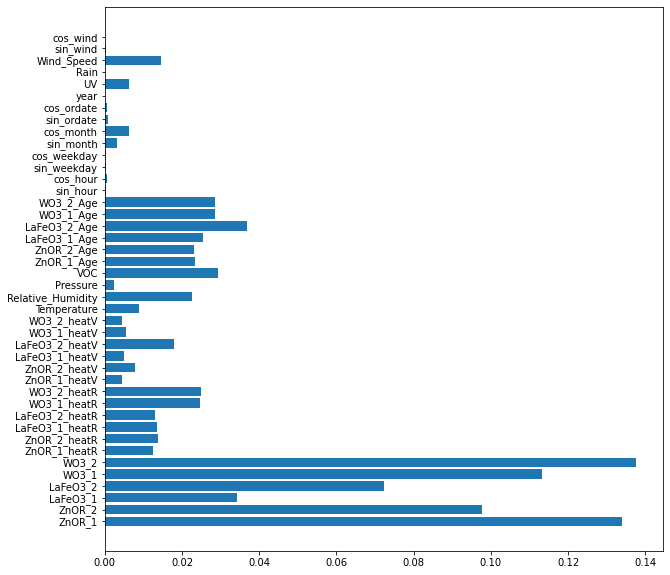

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.barh(X_test.columns, rf_random.best_estimator_.feature_importances_)
plt.show()

## Prediction vs. Reality

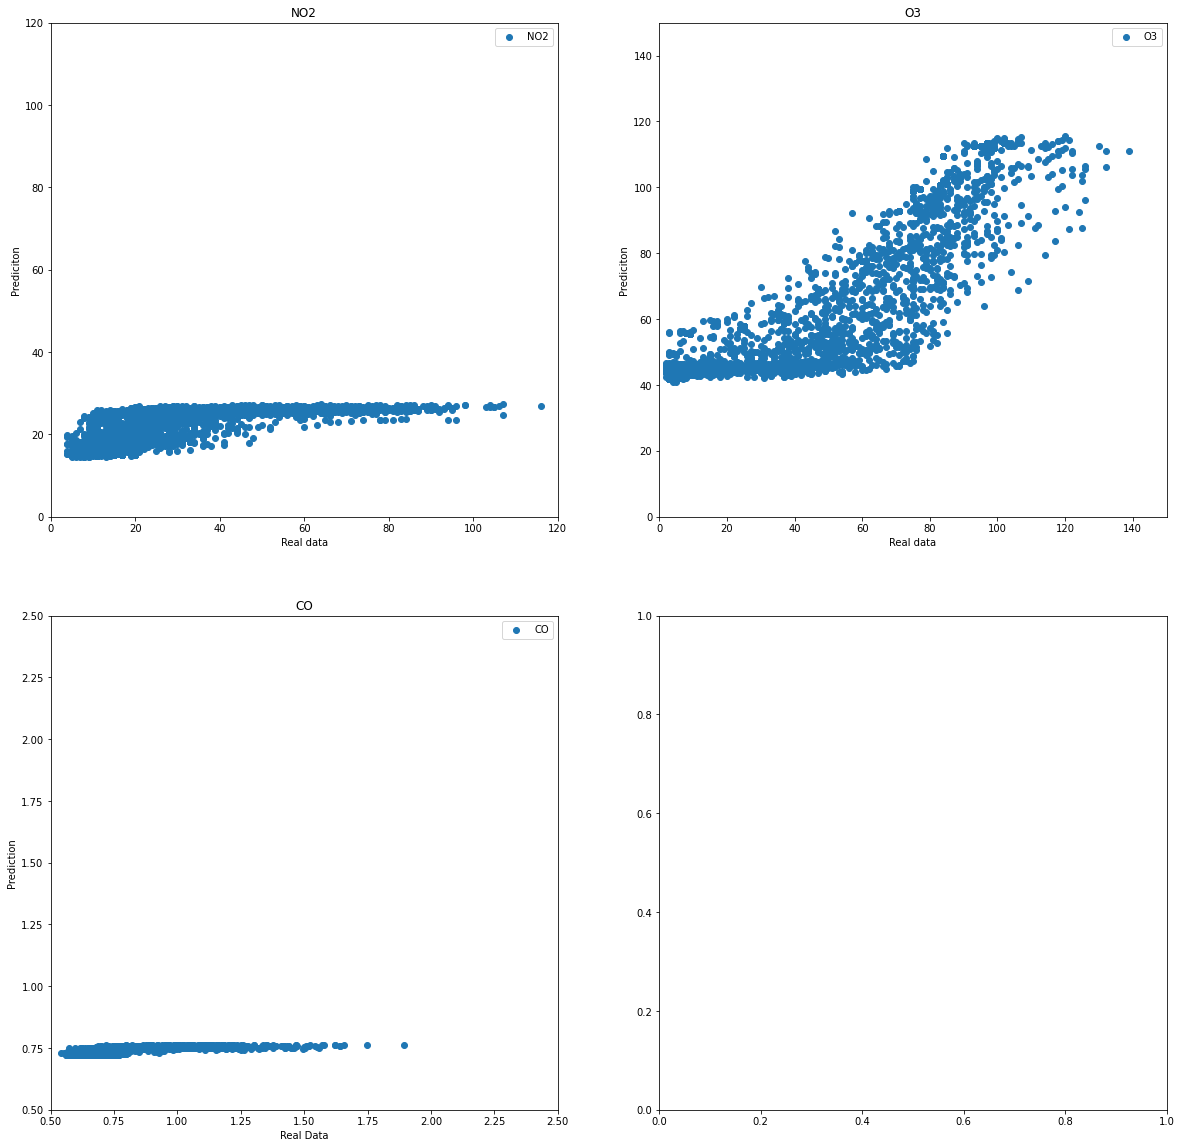

In [11]:
#Printing the charts to undersand better our predictions

fig,((ax1,ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

ax1.scatter(Y_test.NO2, rf_random.predict(X_test)[:, 0], label = "NO2")
ax2.scatter(Y_test.O3, rf_random.predict(X_test)[:, 1], label = "O3")
ax3.scatter(Y_test.CO, rf_random.predict(X_test)[:, 2], label = "CO")

ax1.set_xlim(0, 120)
ax1.set_ylim(0, 120)
ax2.set_xlim(0, 150)
ax2.set_ylim(0, 150)
ax3.set_xlim(0.5, 2.5)
ax3.set_ylim(0.5, 2.5)

ax1.set_title('NO2')
ax1.set_xlabel('Real data')
ax1.set_ylabel('Prediciton')
ax2.set_title('O3')
ax2.set_xlabel('Real data')
ax2.set_ylabel('Prediciton')
ax3.set_title('CO')
ax3.set_xlabel('Real Data')
ax3.set_ylabel('Prediction')

ax1.legend()
ax2.legend()
ax3.legend()

plt.show()